# Modeling Saturation Properties of Water

<br>

This notebook aims to create regression models to predict saturation properties of water, based on experimental data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
import warnings
import sys
sys.path.append('../modules/')
from utils_functions import utils
from validation import validate
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

############################################# IMPORTANT DEFINITIONS ###########################################################
RANDOM_SEED = 1002
warnings.filterwarnings('ignore')
SATURATION_DATA_FILEPATH = '../data'
SATURATION_FILENAME = 'SaturationProperties.xlsx'
FLUID_CODE = 3 # water
compound = 'water'
basic = utils()
validation = validate()

## 1. Vapor Pressure

In [2]:
# import data
data = basic.load_filter_data(vapor_fraction = 0, 
                              fluid_code = FLUID_CODE, 
                              complete_filepath = os.path.join(SATURATION_DATA_FILEPATH, SATURATION_FILENAME))
data.head()

,t,p,x,v,h,s
0,273.16,0.000612,0,0.018019,0.000011,0.000000
1,280.00,0.000992,0,0.018018,0.518770,0.001876
2,290.00,0.001920,0,0.018038,1.274200,0.004527
3,300.00,0.003537,0,0.018079,2.027900,0.007082
4,310.00,0.006231,0,0.018136,2.781000,0.009551


### 1.1 Vapor Pressure Model Validation

[INFO] Mean Absolute Error: 0.0006
[INFO] Root Mean Squared Error: 0.0238
[INFO] R2 Score: 1.0000


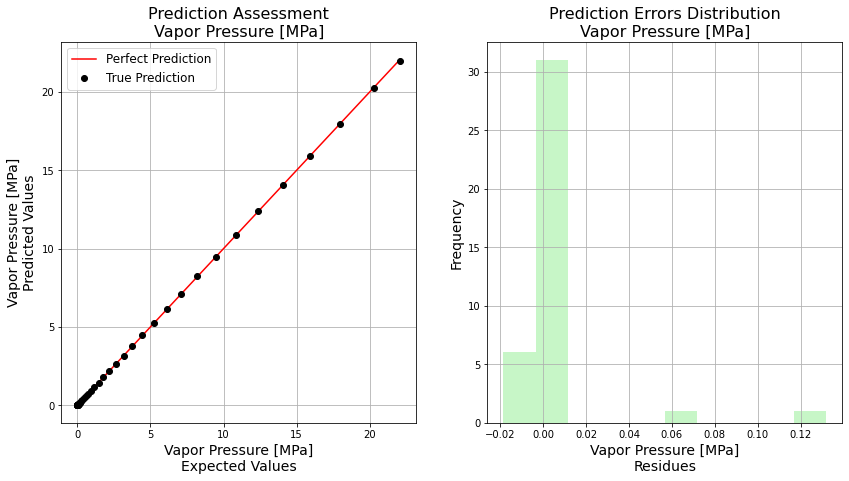

In [3]:
validation.vapor_pressure(data, FLUID_CODE)

### 1.2. Saturation Temperature Model Validation

[INFO] Mean Absolute Error: 0.0130
[INFO] Root Mean Squared Error: 0.1138
[INFO] R2 Score: 1.0000


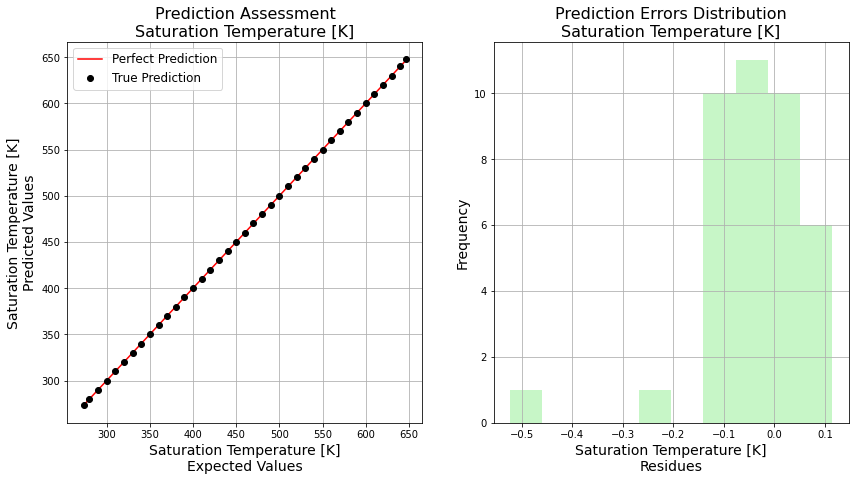

In [4]:
validation.sat_temperature(data, FLUID_CODE)

## 2. Saturated Liquid Specific Volume

In [5]:
# select predictors and target
x = data[['t', 'p']]
y = data[['v']]

Text(0, 0.5, 'specific_volume')

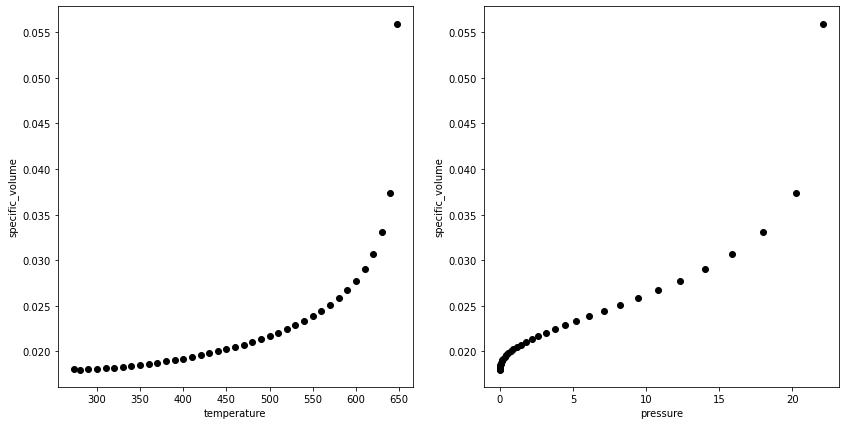

In [6]:
# explore correlations between predictors and target
fig = plt.figure(figsize = (14,7))
ax1 = fig.add_subplot(1,2,1)
plt.plot(x['t'], y, 'ko')
plt.xlabel('temperature')
plt.ylabel('specific_volume')

ax2 = fig.add_subplot(1,2,2)
plt.plot(x['p'], y, 'ko')
plt.xlabel('pressure')
plt.ylabel('specific_volume')

In [7]:
basic.model_training_selection(x, y, 'SatLiquidVolume_'+compound, times_to_interpolate = 4)

[INFO] Linear Regression cross validation MAE: 0.0010
[INFO] Linear Regression holdout set MAE: 0.0010
[INFO] Linear Regression holdout set RMSE: 0.0019
[INFO] Linear Regression holdout set R2: 0.9033
-------------------------------------------------------------------------------------------------
[INFO] Decision Tree Regressor cross validation MAE: 0.0001
[INFO] Decision Tree Regressor holdout set MAE: 0.0001
[INFO] Decision Tree Regressor holdout set RMSE: 0.0002
[INFO] Decision Tree Regressor holdout set R2: 0.9986
-------------------------------------------------------------------------------------------------
[INFO] Saving decisiontreeregressor_SatLiquidVolume_water


## 3. Saturated Liquid Specific Enthalpy

In [8]:
# select predictors and target
x = data[['t', 'p']]
y = data[['h']]

Text(0, 0.5, 'specific_enthalpy')

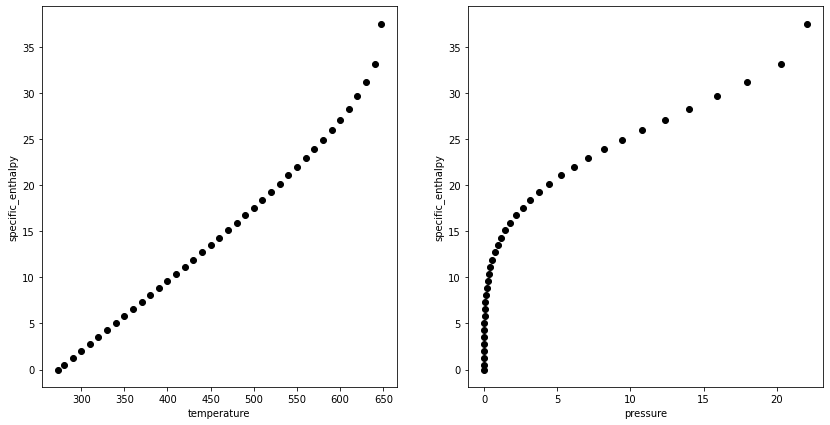

In [9]:
# explore correlations between predictors and target
fig = plt.figure(figsize = (14,7))
ax1 = fig.add_subplot(1,2,1)
plt.plot(x['t'], y, 'ko')
plt.xlabel('temperature')
plt.ylabel('specific_enthalpy')

ax2 = fig.add_subplot(1,2,2)
plt.plot(x['p'], y, 'ko')
plt.xlabel('pressure')
plt.ylabel('specific_enthalpy')

In [10]:
basic.model_training_selection(x, y, 'SatLiquidEnthalpy_'+compound, times_to_interpolate = 4)

[INFO] Linear Regression cross validation MAE: 0.2390
[INFO] Linear Regression holdout set MAE: 0.2447
[INFO] Linear Regression holdout set RMSE: 0.4172
[INFO] Linear Regression holdout set R2: 0.9981
-------------------------------------------------------------------------------------------------
[INFO] Decision Tree Regressor cross validation MAE: 0.0715
[INFO] Decision Tree Regressor holdout set MAE: 0.0695
[INFO] Decision Tree Regressor holdout set RMSE: 0.0841
[INFO] Decision Tree Regressor holdout set R2: 0.9999
-------------------------------------------------------------------------------------------------
[INFO] Saving decisiontreeregressor_SatLiquidEnthalpy_water


## 4. Saturated Liquid Specific Entropy

In [11]:
# select predictors and target
x = data[['t', 'p']]
y = data[['s']]

Text(0, 0.5, 'specific_entropy')

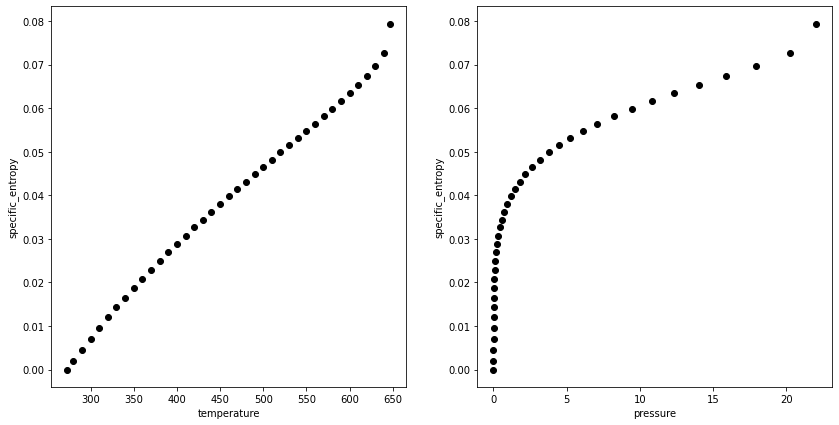

In [12]:
# explore correlations between predictors and target
fig = plt.figure(figsize = (14,7))
ax1 = fig.add_subplot(1,2,1)
plt.plot(x['t'], y, 'ko')
plt.xlabel('temperature')
plt.ylabel('specific_entropy')

ax2 = fig.add_subplot(1,2,2)
plt.plot(x['p'], y, 'ko')
plt.xlabel('pressure')
plt.ylabel('specific_entropy')

In [13]:
basic.model_training_selection(x, y, 'SatLiquidEntropy_'+compound, times_to_interpolate = 4)

[INFO] Linear Regression cross validation MAE: 0.0010
[INFO] Linear Regression holdout set MAE: 0.0011
[INFO] Linear Regression holdout set RMSE: 0.0013
[INFO] Linear Regression holdout set R2: 0.9959
-------------------------------------------------------------------------------------------------
[INFO] Decision Tree Regressor cross validation MAE: 0.0002
[INFO] Decision Tree Regressor holdout set MAE: 0.0001
[INFO] Decision Tree Regressor holdout set RMSE: 0.0002
[INFO] Decision Tree Regressor holdout set R2: 0.9999
-------------------------------------------------------------------------------------------------
[INFO] Saving decisiontreeregressor_SatLiquidEntropy_water


## 5. Saturated Vapor Specific Volume

In [14]:
# import data
data = basic.load_filter_data(vapor_fraction = 1, 
                              fluid_code = FLUID_CODE, 
                              complete_filepath = os.path.join(SATURATION_DATA_FILEPATH, SATURATION_FILENAME))

In [15]:
# select predictors and target
x = data[['t', 'p']]
y = data[['v']]

Text(0, 0.5, 'specific_volume')

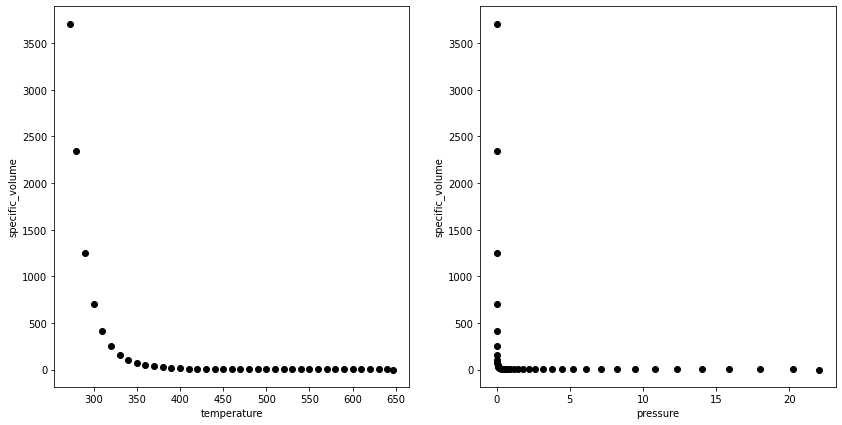

In [16]:
# explore correlations between predictors and target
fig = plt.figure(figsize = (14,7))
ax1 = fig.add_subplot(1,2,1)
plt.plot(x['t'], y, 'ko')
plt.xlabel('temperature')
plt.ylabel('specific_volume')

ax2 = fig.add_subplot(1,2,2)
plt.plot(x['p'], y, 'ko')
plt.xlabel('pressure')
plt.ylabel('specific_volume')

In [17]:
basic.model_training_selection(x, y, 'SatVaporVolume_' + compound, times_to_interpolate = 6)

[INFO] Linear Regression cross validation MAE: 300.3335
[INFO] Linear Regression holdout set MAE: 277.6629
[INFO] Linear Regression holdout set RMSE: 401.5163
[INFO] Linear Regression holdout set R2: 0.3354
-------------------------------------------------------------------------------------------------
[INFO] Decision Tree Regressor cross validation MAE: 1.8196
[INFO] Decision Tree Regressor holdout set MAE: 1.2976
[INFO] Decision Tree Regressor holdout set RMSE: 4.4332
[INFO] Decision Tree Regressor holdout set R2: 0.9999
-------------------------------------------------------------------------------------------------
[INFO] Saving decisiontreeregressor_SatVaporVolume_water


## 6. Saturated Vapor Specific Enthalpy

Text(0, 0.5, 'specific_enthalpy')

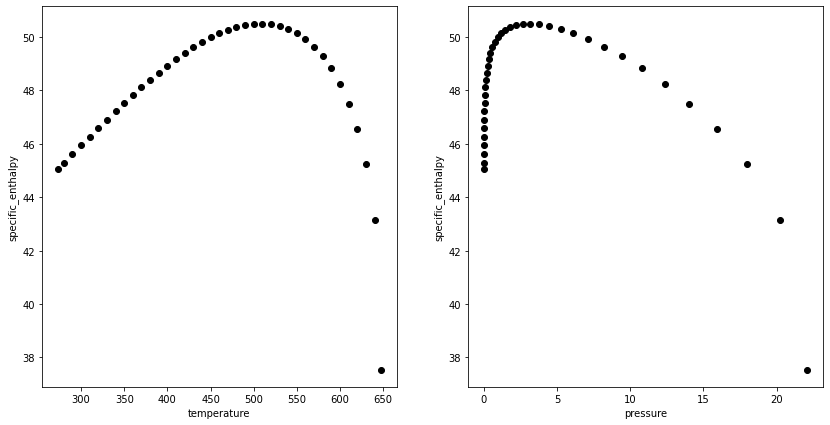

In [18]:
# select predictors and target
x = data[['t', 'p']]
y = data[['h']]

# explore correlations between predictors and target
fig = plt.figure(figsize = (14,7))
ax1 = fig.add_subplot(1,2,1)
plt.plot(x['t'], y, 'ko')
plt.xlabel('temperature')
plt.ylabel('specific_enthalpy')

ax2 = fig.add_subplot(1,2,2)
plt.plot(x['p'], y, 'ko')
plt.xlabel('pressure')
plt.ylabel('specific_enthalpy')

In [19]:
basic.model_training_selection(x, y, 'SatVaporEnthalpy_' + compound, times_to_interpolate = 6)

[INFO] Linear Regression cross validation MAE: 0.2910
[INFO] Linear Regression holdout set MAE: 0.3082
[INFO] Linear Regression holdout set RMSE: 0.5996
[INFO] Linear Regression holdout set R2: 0.9309
-------------------------------------------------------------------------------------------------
[INFO] Decision Tree Regressor cross validation MAE: 0.0086
[INFO] Decision Tree Regressor holdout set MAE: 0.0090
[INFO] Decision Tree Regressor holdout set RMSE: 0.0217
[INFO] Decision Tree Regressor holdout set R2: 0.9999
-------------------------------------------------------------------------------------------------
[INFO] Saving decisiontreeregressor_SatVaporEnthalpy_water


## 7. Saturated Vapor Specific Entropy

Text(0, 0.5, 'specific_entropy')

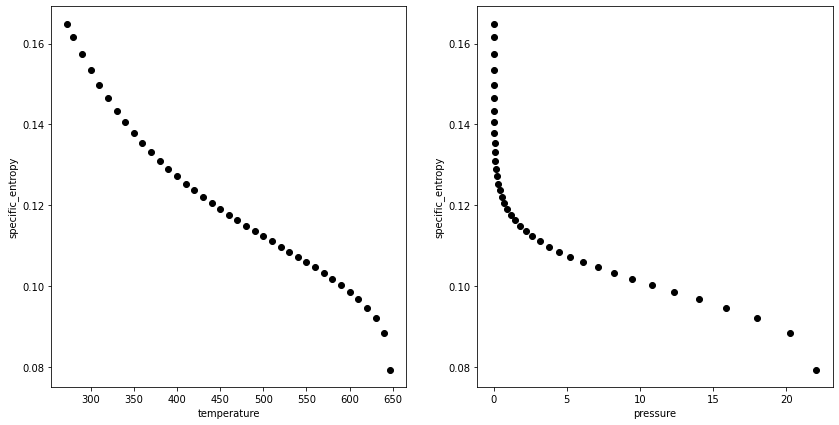

In [20]:
# select predictors and target
x = data[['t', 'p']]
y = data[['s']]

# explore correlations between predictors and target
fig = plt.figure(figsize = (14,7))
ax1 = fig.add_subplot(1,2,1)
plt.plot(x['t'], y, 'ko')
plt.xlabel('temperature')
plt.ylabel('specific_entropy')

ax2 = fig.add_subplot(1,2,2)
plt.plot(x['p'], y, 'ko')
plt.xlabel('pressure')
plt.ylabel('specific_entropy')

In [21]:
basic.model_training_selection(x, y, 'SatVaporEntropy_' + compound, times_to_interpolate = 6)

[INFO] Linear Regression cross validation MAE: 0.0026
[INFO] Linear Regression holdout set MAE: 0.0026
[INFO] Linear Regression holdout set RMSE: 0.0031
[INFO] Linear Regression holdout set R2: 0.9749
-------------------------------------------------------------------------------------------------
[INFO] Decision Tree Regressor cross validation MAE: 0.0000
[INFO] Decision Tree Regressor holdout set MAE: 0.0000
[INFO] Decision Tree Regressor holdout set RMSE: 0.0001
[INFO] Decision Tree Regressor holdout set R2: 1.0000
-------------------------------------------------------------------------------------------------
[INFO] Saving decisiontreeregressor_SatVaporEntropy_water


## 8. Saturation Property Models Validation

<br>

### 8.1. Specific Volume

In [22]:
data1 = basic.load_filter_data(vapor_fraction = 0, 
                              fluid_code = FLUID_CODE, 
                              complete_filepath = os.path.join(SATURATION_DATA_FILEPATH, SATURATION_FILENAME))
data2 = basic.load_filter_data(vapor_fraction = 1, 
                              fluid_code = FLUID_CODE, 
                              complete_filepath = os.path.join(SATURATION_DATA_FILEPATH, SATURATION_FILENAME))
data = pd.concat([data1, data2])

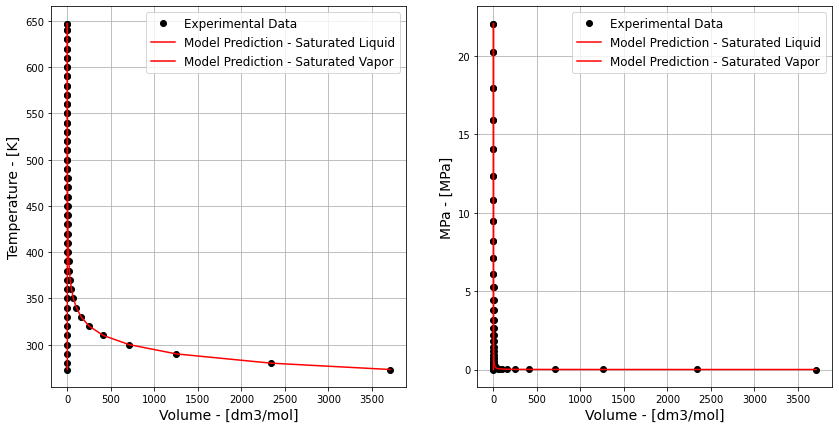

In [23]:
validation.saturation_properties(data, FLUID_CODE, 'v')

### 8.2. Specific Enthalpy

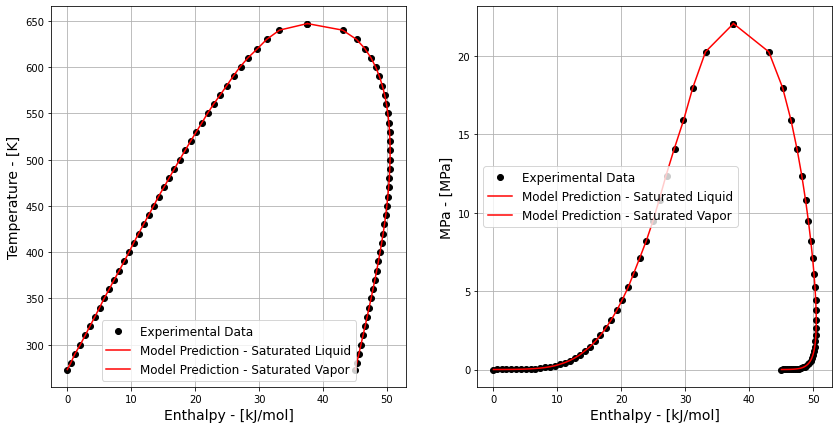

In [24]:
validation.saturation_properties(data, FLUID_CODE, 'h')

### 8.3. Specific Entropy

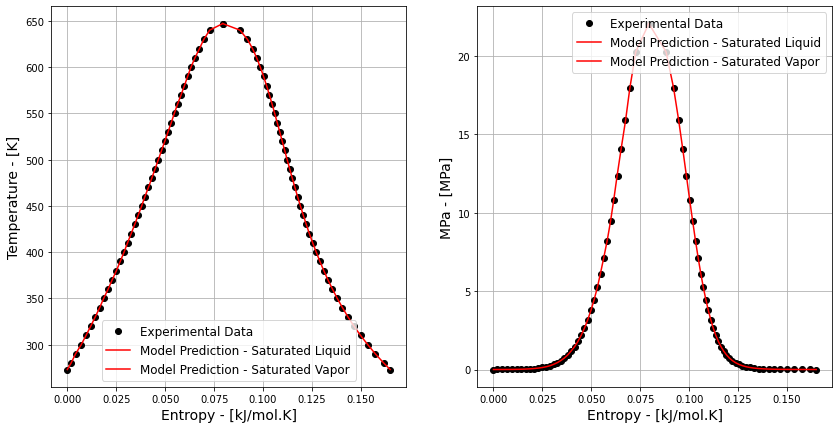

In [25]:
validation.saturation_properties(data, FLUID_CODE, 's')